In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
dataset.shape

(7613, 5)

In [5]:
print(dataset["target"].value_counts())
print(dataset["target"].value_counts(normalize=True)*100)

0    4342
1    3271
Name: target, dtype: int64
0    57.034021
1    42.965979
Name: target, dtype: float64


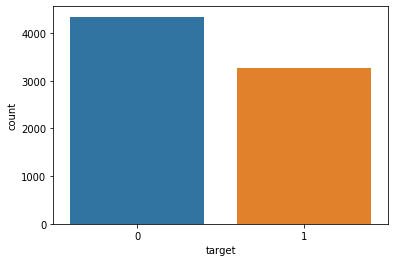

In [6]:
sns.countplot(dataset["target"])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
dataset_text=dataset.drop(columns=["id","keyword","location"])

In [10]:
train, test = train_test_split(dataset_text, test_size=0.2,shuffle=True)

In [11]:
print(len(train))
print(len(test))

6090
1523


In [22]:
train.text[:10]

5893    SocialWOTS: GLOBI_inclusion: RT NRC_MiddleEast...
5930    26 people have screamed right in my ear this w...
503     @eunice_njoki aiii she needs to chill and answ...
2312    Man Cam just demolished his plate. His ass was...
2785    å¬'Only the sea knows how many are dead' @MSF_...
3693    I liked a @YouTube video from @deathmule http:...
342     Paul Craig Roberts ÛÒ Vladimir Putin Issues M...
2249    Businesses abe deluged with invoices. Make you...
761     Just realized my dude @_OnlyFTF was on that 'W...
4401    Hijacking Electric Skateboards to Make Them Sa...
Name: text, dtype: object

In [53]:
batch_size=32
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=42)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'train'

In [ ]:
ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))

AttributeError: 'DataFrame' object has no attribute 'batch'

In [12]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=16):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [14]:
train_ds = df_to_dataset(train, batch_size=16)

In [15]:
test_ds = df_to_dataset(test, shuffle=False, batch_size=16)

In [16]:
train_ds

<BatchDataset shapes: ({text: (None,)}, (None,)), types: ({text: tf.string}, tf.int64)>

In [17]:
test_ds

<BatchDataset shapes: ({text: (None,)}, (None,)), types: ({text: tf.string}, tf.int64)>

In [27]:
for i in train_ds.take(1):
    print(i)


({'text': <tf.Tensor: shape=(16,), dtype=string, numpy=
array([b"@stunckle @Gordon_R74 @crazydoctorlady ...I'm no expert but raw uranium and nuclear reactor fuel rods are 2 very different creatures...",
       b'If time heals all wounds how come the belly button stays the same?',
       b"in fact if y'all could tag like small creeping or self inflicted injuries of the skin as derma (with brackets) that would be nice",
       b"@Homukami Only URs and SRs matter Rs you'll be drowning in. Tho you're already drowning in Ns lol.",
       b"Have you ever seen the President \nwho killed your wounded child?\nOr the man that crashed your sister's plane \nclaimin' he was sent of God?",
       b"I'm just going to say it. Under the new reddit policy changes I think /r/conspiracy will be quarantined and how that's bad for the truth m\xc2\x89\xc3\x9b_",
       b'Enter the world of extreme diving \xc2\x89\xc3\x9b\xc3\x93 9 stories up and into the Volga River http://t.co/7adqV1gRVR',
       b'There so

In [39]:
train_examples_batch, train_labels_batch = next(iter(train_ds.batch(10)))

In [40]:
train_examples_batch

{'text': <tf.Tensor: shape=(10, 16), dtype=string, numpy=
 array([[b'NEW YORK: A whirlwind day of activities in New York. Breakfast at the Millennium Hotel United Nations Plaza. Lunch... http://t.co/laYZBA9y8h',
         b"late night mcdonalds with friends = hilarious although my car is wrecked and there's half a steak pastie in the industrial estate",
         b"@kinkyconnors IM sorry for my meltdown last night lmao but I'm getting my tooth fixed Friday ??????????????????????????????????",
         b'A country Chim can survive!',
         b'Beware of your temper and a loose tongue! These two dangerous weapons combined can lead a person to the Hellfire #islam!',
         b"Russia destroys food while people go hungry.  We're not the only ones with an insane government.\nhttp://t.co/ZonNqGsxYw",
         b'RT @WIRED: Reddit will now quarantine offensive content http://t.co/zlAGv1U5ZA',
         b'THE LINKS TO WATCH THE SHOW BETTER WORK OR I MIGHT ELECTROCUTE SOMEONE',
         b'@mrsbink

In [41]:
train_labels_batch

<tf.Tensor: shape=(10, 16), dtype=int64, numpy=
array([[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]], dtype=int64)>

In [29]:
!pip install -q tensorflow-hub

In [31]:
import tensorflow_hub as hub
print("Hub version: ", hub.__version__)

Hub version:  0.9.0


In [43]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
# hub_layer(train_examples_batch[:3])

In [44]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
history = model.fit(train_ds.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=test_ds,
                    verbose=1)

Epoch 1/20


ValueError: in user code:

    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow_hub\keras_layer.py:236 call  *
        result = f()
    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow\python\saved_model\load.py:509 _call_attribute  **
        return instance.__call__(*args, **kwargs)
    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py:780 __call__
        result = self._call(*args, **kwds)
    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py:814 _call
        results = self._stateful_fn(*args, **kwds)
    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow\python\eager\function.py:2828 __call__
        graph_function, args, kwargs = self._maybe_define_function(args, kwargs)
    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow\python\eager\function.py:3171 _maybe_define_function
        *args, **kwargs)
    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow\python\eager\function.py:2622 canonicalize_function_inputs
        self._flat_input_signature)
    C:\Users\Abdessamad\Anaconda3\lib\site-packages\tensorflow\python\eager\function.py:2713 _convert_inputs_to_signature
        format_error_message(inputs, input_signature))

    ValueError: Python inputs incompatible with input_signature:
      inputs: (
        Tensor("IteratorGetNext:0", shape=(None, None), dtype=string))
      input_signature: (
        TensorSpec(shape=(None,), dtype=tf.string, name=None))
